In [1]:
import pandas as pd


In [2]:
data=pd.read_parquet('..\..\curated\df_ordenes_compras.parquet')

print(data.isnull().sum())

Companía                 0
OrdenCompra              0
Item_Commodity           0
Descripcion              0
Descripcion_items        0
CantidadPedida           0
CantidadRecibida         0
PrecioUnitario           0
Total                    0
NEntregas                0
EstadoLínea              0
CentroCosto              0
EstadoOrdenCompra        0
Clasificacion            0
Proveedor                0
FechaPreparación         0
FechaEntrega            36
AlmacenIngreso       20197
FormadePago            109
Numero                 109
dtype: int64


In [3]:
## datos los nulos , requerimos quitar los campos  FechaEntrega     AlmacenIngreso   Numero    
data_frame_1 = data.drop(columns=['FechaEntrega','EstadoLínea','CentroCosto','Companía','NEntregas', 'OrdenCompra','AlmacenIngreso', 'Numero','Descripcion','Descripcion_items'])
data_frame_1=data_frame_1[data_frame_1['FormadePago'].notna()]


In [4]:
data_frame_1.size

439700

In [5]:
#### 
data_frame_1['FechaPreparación'] = pd.to_datetime(data_frame_1['FechaPreparación'])


In [6]:
data_frame_1

,Item_Commodity,CantidadPedida,CantidadRecibida,PrecioUnitario,Total,EstadoOrdenCompra,Clasificacion,Proveedor,FechaPreparación,FormadePago
0,11006,1.0,0.0,19576.270000,19576.27,Anulada,LOC,INSTALACIONES TRC SAC,2018-05-03 16:05:52.973,L/60 Días
1,11006,1.0,1.0,19576.270000,19576.27,Completada,LOC,INSTALACIONES TRC SAC,2018-07-04 18:28:46.013,Crédito
2,11006,20.0,20.0,70.200000,1404.00,Completada,Compra Medicinas/M.Medicos,ALFARO S.A.C.,2020-12-03 13:07:45.984,L/120 Días
3,8010,1.0,1.0,164749.423730,164749.42,Completada,LOC,SIEMENS HEALTHCARE S.A.C,2018-05-03 17:25:35.040,10% Adelantado - Saldo Crédito (12)
4,8010,2.0,2.0,15.439970,30.88,Completada,LOC,ALFARO S.A.C.,2018-05-08 08:30:11.002,L/90 Días
...,...,...,...,...,...,...,...,...,...,...
44073,7741,5.0,5.0,67.627119,338.14,Completada,Compra Medicinas/M.Medicos,IMPROVENG S.R.L.,2024-03-19 14:17:40.963,L/120 Días
44074,7633,15.0,15.0,35.644068,534.66,Aprobada,Compra Medicinas/M.Medicos,DIMEXA,2024-04-05 15:51:04.003,L/90 Días
44075,13580,15.0,15.0,40.347458,605.21,Aprobada,Compra Medicinas/M.Medicos,DIMEXA,2024-04-05 15:51:04.003,L/90 Días
44076,13582,1.0,1.0,2719.161017,2719.16,Completada,Compra Medicinas/M.Medicos,QUIMICA SUIZA S.A.,2024-04-05 16:06:08.006,Contado


In [7]:
# Asegúrate de que 'FechaPreparación' es datetime
data_frame_1['FechaPreparación'] = pd.to_datetime(data_frame_1['FechaPreparación'])

# Convertir 'FechaPreparación' a un periodo mensual y luego a datetime
data_frame_1['Mes'] = data_frame_1['FechaPreparación'].dt.to_period('M').dt.start_time

# Eliminar la columna original 'FechaPreparación'
#data_frame_1 = data_frame_1.drop(columns=['FechaPreparación'])


In [8]:
data_cleaned=data_frame_1

In [9]:
data_cleaned.columns

Index(['Item_Commodity', 'CantidadPedida', 'CantidadRecibida',
       'PrecioUnitario', 'Total', 'EstadoOrdenCompra', 'Clasificacion',
       'Proveedor', 'FechaPreparación', 'FormadePago', 'Mes'],
      dtype='object')

In [11]:
# Agrupar datos por 'Mes' y sumar las 'cantidad_items'
monthly_data = data_cleaned.groupby(data_cleaned['FechaPreparación'].dt.to_period('M')).agg({'CantidadPedida': 'sum'}).reset_index()
# Convertir 'Mes' de nuevo a string para mejor visualización
monthly_data


,FechaPreparación,CantidadPedida
0,2018-05,1050824.185
1,2018-06,243121.000
2,2018-07,198604.000
3,2018-08,129987.000
4,2018-09,121083.000
...,...,...
67,2023-12,160885.000
68,2024-01,149970.000
69,2024-02,105293.000
70,2024-03,42849.000


In [13]:
data_cleaned.columns

Index(['Item_Commodity', 'CantidadPedida', 'CantidadRecibida',
       'PrecioUnitario', 'Total', 'EstadoOrdenCompra', 'Clasificacion',
       'Proveedor', 'FechaPreparación', 'FormadePago', 'Mes'],
      dtype='object')

In [14]:
# Intentar contar cuántos meses de datos están disponibles para cada 'Item_Commodity'
# Agrupar por 'Mes' y 'Item_Commodity', y calcular sumas y promedios
detailed_grouped_data = data_cleaned.groupby(['Proveedor','FormadePago','Clasificacion','FechaPreparación', 'Item_Commodity']).agg({
    'CantidadPedida': 'sum',
    'CantidadRecibida': 'sum',
    'PrecioUnitario': 'mean',
    'Total': 'sum'
}).reset_index()
# Convertir 'Mes' de nuevo a string para mejor visualización


In [18]:
detailed_grouped_data['PrecioUnitario']=detailed_grouped_data['PrecioUnitario'].astype(float)
detailed_grouped_data['Total']=detailed_grouped_data['Total'].astype(float)

In [42]:
data=detailed_grouped_data

In [43]:
data = data.drop(columns=['FechaPreparación'])

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Definir qué columnas son categóricas
categorical_features = ['Proveedor', 'FormadePago', 'Clasificacion']  # Ajusta según tu dataset

# Crear el transformador de columnas usando OneHotEncoder para las características categóricas
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Dejar las otras columnas sin cambios
)

# Aplicar el transformador al conjunto de datos
X_transformed = column_transformer.fit_transform(data.drop('CantidadPedida', axis=1))  # Asumiendo que 'CantidadPedida' es tu variable objetivo

# Si necesitas un DataFrame en lugar de un numpy array para ver los nombres de columnas:
feature_names = column_transformer.get_feature_names_out()


# Ahora, 'X_transformed' o 'X_transformed_df' puede ser usado para entrenamiento


ValueError: Shape of passed values is (42713, 1), indices imply (42713, 252)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Separar las etiquetas
y = data['CantidadPedida']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suponiendo que y_test son los valores reales y y_pred son las predicciones del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 8.131742572866674
Mean Squared Error: 14332.050164366576
Root Mean Squared Error: 119.71654089709816
R-squared: 0.9783251306210742


d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


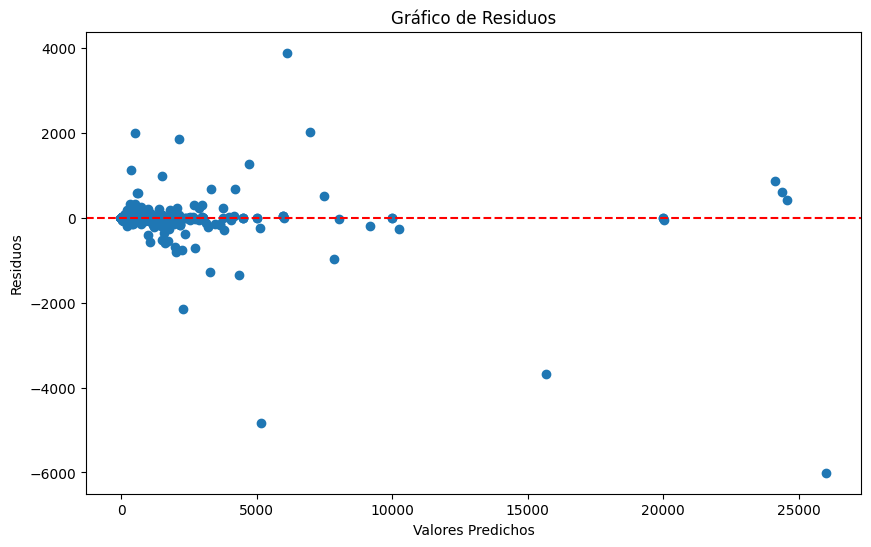

In [49]:
import matplotlib.pyplot as plt

residuos = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuos)
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [50]:
from sklearn.model_selection import cross_val_score

# Ejemplo de validación cruzada con RMSE
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)  # Convertir a RMSE

print(f'RMSE scores: {rmse_scores}')
print(f'RMSE mean: {rmse_scores.mean()}')
print(f'RMSE std deviation: {rmse_scores.std()}')


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'ALFARO S.A.C.'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "d:\UPC\ProjectsTesis\PI 2\GIT\MedPredictPI\.venv\lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'A.TARRILLO BARBA S.A'
